# Rascunho

FUNCOES COMUNS

EDOs

1.
\begin{equation}
dy/dt = -y*y + a*y - b, y(0)= e
\end{equation}

2.
\begin{equation}
dy/dt = a*y - b, y(0)= e
\end{equation}

3.
\begin{equation}
dy/dt = - b, y(0)= e
\end{equation}

SOLUCAO ANALITICA

1.
\begin{equation}
1/2 (a - sqrt(-a^2 + 4 b) tan(1/2 sqrt(-a^2 + 4 b) t - tan^(-1)((-a + 2 e)/sqrt(-a^2 + 4 b))))
\end{equation}

2.
\begin{equation}
(b - b e^(a t) + a e^(1 + a t))/a
\end{equation}

3.
\begin{equation}
e - b t
\end{equation}

In [1]:
# if u > theta_v:
#   J_fi = (v / tau_fi) * (-u*u + (u_u + theta_v)*u - u_u*theta_v)
#   a = (v / tau_fi) * (u_u + theta_v)
#   b = (v / tau_fi) * (u_u*theta_v)
# else
#   J_fi = 0
#   a = 0
#   b = 0

# if u > theta_w:
#   J_so = 1 / tau_so
#   J_si = -w*s / tau_si
#   a = 0
#   b = - J_so - J_si
# else
#   J_so = (u - u_o) / tau_o
#   J_si = 0
#   a = 1 / tau_o
#   b = u_o / tau_o

u > theta_v

In [2]:
# y[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt*np.sqrt(4*b*c - a*a) - np.arctan((a + 2*y[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c

u < theta_v && u < theta_w

In [3]:
# y[i+1] = (-b * np.exp(a * dt) + a * u[i] + b) * np.exp(-a * dt) / (a)

u < theta_v && u > theta_w

In [4]:
# y[i+1] = y[i] - b*dt

# Implementacao

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Configuracoes de espaco
dx = 0.5 # Passo
x0 = 0
xf = 100
Num_pts_x = (int)((xf - x0) / dx) # Numero de pontos
x = np.linspace(0, xf, Num_pts_x+1) # Pontos no espaco

# Configuracoes de tempo
# dt = 10**-1 # Passo de tempo
dt = 0.1
t0 = 0
tf = 600
Num_pts_t = (int)((tf - t0) / dt) # Numero de pontos
t = np.linspace(0, tf, Num_pts_t+1) # Pontos no tempo

D = 1.171 # coeficiente difusao

# Parameters for EPI

#- uniforme: 2x mais e metade

# u_o = 0.0
# u_u = 1.55
# theta_v = 0.3
# theta_w = 0.13
# theta_v_minus = 0.006
# theta_o = 0.006
# tau_v1_minus = 60.0
# tau_v2_minus = 1150.0
# tau_v_plus = 1.4506
# tau_w1_minus = 60.0
# tau_w2_minus = 15.0
# k_w_minus = 65.0
# u_w_minus = 0.03
# tau_w_plus = 200.0
# tau_fi = 0.11
# tau_o1 = 400.0
# tau_o2 = 6.0
# tau_so1 = 30.0181
# tau_so2 = 0.9957
# k_so = 2.0458
# u_so = 0.65
# tau_s1 = 2.7342
# tau_s2 = 16.0
# k_s = 2.0994
# u_s = 0.9087
# tau_si = 1.8875
# tau_w_inf = 0.07
# w_inf_star = 0.94

u_o =  -84.0
u_u = 135.406
theta_v = -58.29
theta_w =  -82.7145
theta_v_minus =-82.7145
theta_o = -83.4858
tau_v1_minus = 60.0
tau_v2_minus = 1150.0
tau_v_plus = 1.4506
tau_w1_minus = 60.0
tau_w2_minus = 15.0
k_w_minus = 0.7584597432905484
u_w_minus = -81.429
tau_w_plus = 200.0
tau_fi = 807.8939
tau_o1 = 400.0
tau_o2 = 6.0
tau_so1 = 30.0181
tau_so2 = 0.9957
k_so = 0.023337222870478413
u_so =  -28.294999999999995
tau_s1 = 2.7342
tau_s2 = 16.0
k_s = 0.02449708284714119
u_s = -6.1244099999999975
tau_si = 1.8875
tau_w_inf = 5.9990000000000006
w_inf_star = 0.94

# Standard Heaviside function
def H(x):
  if (x >= 0.0):
    return 1.0
  else:
    return 0.0

# Functions for infinity values
def v_inf(u):
  if (u < theta_v_minus):
    return 1.0
  else:
    return 0.0

def w_inf(u):
  return (1.0 - H(u - theta_o)) * (1.0 - u/tau_w_inf) + H(u - theta_o) * w_inf_star

# Functions for time constants
def tau_v_minus(u):
  return (1.0 - H(u - theta_v_minus)) * tau_v1_minus + H(u - theta_v_minus) * tau_v2_minus

def tau_w_minus(u):
  return tau_w1_minus + (tau_w2_minus - tau_w1_minus) * (1.0 + np.tanh(k_w_minus * (u - u_w_minus))) / 2

def tau_so(u):
  return tau_so1 + (tau_so2 - tau_so1) * (1.0 + np.tanh(k_so * (u - u_so))) / 2

def tau_s(u):
  return (1.0 - H(u - theta_w)) * tau_s1 + H(u - theta_w) * tau_s2

def tau_o(u):
  return (1.0 - H(u - theta_o)) * tau_o1 + H(u - theta_o) * tau_o2

# Functions for currents

# novo metodo
def J_fi(u, v):
  return -v * H(u - theta_v) * (u - theta_v) * (u_u - u) / tau_fi

def J_so(u):
  return (u - u_o) * (1.0 - H(u - theta_w)) / tau_o(u) + H(u - theta_w) / tau_so(u)

def J_si(u, w, s):
  return -H(u - theta_w) * w * s / tau_si

# Variables
u = np.zeros((Num_pts_t+1))
v = np.zeros((Num_pts_t+1))
w = np.zeros((Num_pts_t+1))
s = np.zeros((Num_pts_t+1))

# Initial conditions
for i in range(0, Num_pts_x+1):
  u[i] = -84.0
  v[i] = 1.0
  w[i] = 1.0
  s[i] = 0.0

In [6]:
# RUSH LARSEN IMPLEMENTATION:

# s:
def tau_s_rl(u):
  return (1.0 - H(u - theta_w)) * tau_s1 + H(u - theta_w) * tau_s2

def s_inf_rl(u):
  return (1.0 + np.tanh(k_s * (u - u_s))) / 2

# v:
def tau_v_rl(u):
  return (tau_v_plus * tau_v_minus(u)) / (tau_v_plus - tau_v_plus * H(u - theta_v) + tau_v_minus(u) * H(u - theta_v))

def v_inf_rl(u):
  return (tau_v_plus * v_inf(u) * (1 - H(u - theta_v))) / (tau_v_plus - tau_v_plus * H(u - theta_v) + tau_v_minus(u) * H(u - theta_v))

# w:
def tau_w_rl(u):
  return (tau_w_plus * tau_w_minus(u)) / (tau_w_plus - tau_w_plus * H(u - theta_w) + tau_w_minus(u) * H(u - theta_w))

def w_inf_rl(u):
  return (tau_w_plus * w_inf(u) * (1 - H(u - theta_w))) / (tau_w_plus - tau_w_plus * H(u - theta_w) + tau_w_minus(u) * H(u - theta_w))

  ###########

# def tau_v_minus(u):
#     return (1 - H(u - theta_v_minus)) * tau_v1_minus + H(u - theta_v_minus) * tau_v2_minus


def tau_v(u): #
    return (1 - H(u - theta_v)) * tau_v_minus(u)  + H(u - theta_v) * tau_v_plus

# def tau_w_minus(u):
#     return tau_w1_minus + (tau_w2_minus - tau_w1_minus) * (1 + np.tanh(k_w_minus * (u - u_w_minus))) / 2

def tau_w(u):
     return ((1 - H(u - theta_w)) * tau_w_minus(u)  + H(u - theta_w) * tau_w_plus)

# def tau_so(u):
#     return tau_so1 + (tau_so2 - tau_so1) * (1 + np.tanh(k_so * (u - u_so))) / 2

def tau_s(u):
    return (1 - H(u - theta_w)) * tau_s1 + H(u - theta_w) * tau_s2

# def tau_o(u):
#     return (1 - H(u - theta_o)) * tau_o1 + H(u - theta_o) * tau_o2


def v_inf(u):
    return 1 - H(u - theta_v) - (H(u - theta_v_minus) - H(u - theta_v))

def w_inf(u):
    w = H(theta_w - u) * (
            (1 - H(u- theta_o)) * (1 - ((u - u_o ) /  tau_w_inf)) +
            H(u - theta_o) * w_inf_star
        )
    return w

def s_inf(u,):
    return (1.0 + np.tanh(k_s * (u - u_s))) / 2
# Funções de corrente
def J_fi(u, v):
    return -v * H(u - theta_v) * (u - theta_v) * (u_u - (u-u_o)) / tau_fi

def J_so(u):
    return (u - u_o) * (1 - H(u - theta_w)) / tau_o(u,) + H(u - theta_w) / tau_so(u)

def J_si(u, w, s):
    return -H(u - theta_w) * w * s / tau_si

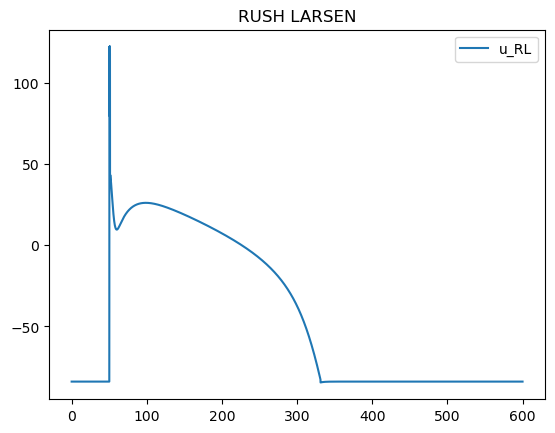

In [7]:
def I_stim(t):
    if ((50.0 < t < 51.0)):
        return 10.0
    else:
        return 0.0
########################
for i in range(0, Num_pts_x+1):
  u[i] = -84.0
  v[i] = 1.0
  w[i] = 1.0
  s[i] = 1.0
for i in range(Num_pts_t):
    # EULER
    # u[i+1] = u[i] + dt * (- (J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    # RUSH LARSEN
    # v:
    # if (tau_v_rl(u[i]) > 10**-10):
    #     v[i+1] = v_inf_rl(u[i]) + (v[i] - v_inf_rl(u[i])) * np.exp(-dt / tau_v_rl(u[i]))
    # else:
    #     v[i+1] = v[i] + dt * ((1.0 - H(u[i] - theta_v)) * (v_inf(u[i]) - v[i]) / tau_v_minus(u[i]) - H(u[i] - theta_v) * v[i] / tau_v_plus)
    # # w:
    # if (tau_w_rl(u[i]) > 10**-10):
    #     w[i+1] = w_inf_rl(u[i]) + (w[i] - w_inf_rl(u[i])) * np.exp(-dt / tau_w_rl(u[i]))
    # else:
    #     w[i+1] = w[i] + dt * ((1.0 - H(u[i] - theta_w)) * (w_inf(u[i]) - w[i]) / tau_w_minus(u[i]) - H(u[i] - theta_w) * w[i] / tau_w_plus)
    # # s:
    # if (tau_s(u[i]) > 10**-10):
    #     s[i+1] = s_inf_rl(u[i]) + (s[i] - s_inf_rl(u[i])) * np.exp(-dt / tau_s_rl(u[i]))
    # else:
    #     s[i+1] = s[i] + dt * (((1.0 + np.tanh(k_s * (u[i] - u_s)))) / 2 - s[i]) / tau_s(u[i])
    #######
    u[i + 1] = u[i] + dt * 85.7  * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))
plt.plot(t, u, label='u_RL')
plt.title('RUSH LARSEN')
plt.legend()
plt.show()

# **SOLUÇÃO FINAL E CORRETA**

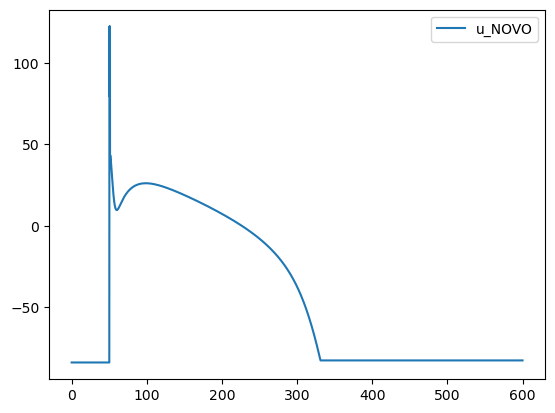

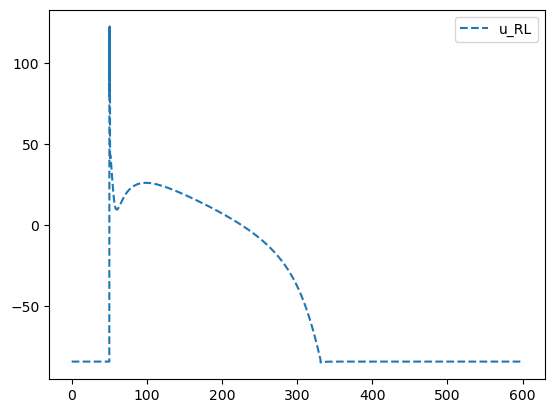

In [8]:
def I_stim(t):
    if ((50.0 < t < 51.0)):
        return 10.0
    else:
        return 0.0

for i in range(Num_pts_t):
    # NOVO METODO - SOLUCAO ANALITICA DE U
    a = 0
    b = 0
    if (H(u[i] - theta_v) == 1.0): # H_v = 1 -> solucao edo -u*c^2 - u*a - b
        a = (-v[i] / tau_fi) * (u_u + theta_v)
        b = (v[i] / tau_fi) * (u_u * theta_v)
        c = (v[i] / tau_fi)
        if (H(u[i] - theta_w) == 1.0): # H_w = 1
          b = b + (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
        else: # H_w = 0
          a = a + 1 / tau_o(u[i])
          b = b + (-u_o / tau_o(u[i]))
        if (4*b*c - a*a > 10**-10):
          u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt*85.7*np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt * 85.7
        else:
          u[i+1] = u[i] + dt * 85.7  * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    else: # H_v = 0
        if (H(u[i] - theta_w) == 1.0): # H_w = 1 -> solucao -b
          b = (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
          u[i+1] = u[i] - b*dt * 85.7 + I_stim(t[i])*dt * 85.7
        else: # H_w = 0 -> solucao -a*y - b
          a = 1 / tau_o(u[i])
          b = -u_o / tau_o(u[i])
          u[i+1] = (np.exp(-a*dt) * (b * (-np.exp(a*dt))) + a*u[i] + b) / (a) + I_stim(t[i])*dt * 85.7

    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))


plt.plot(t, u, label='u_NOVO')
plt.legend()
plt.show()

########################
for i in range(Num_pts_t):
    u[i + 1] = u[i] + dt * 85.7  * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))
plt.plot(t, u, '--',label='u_RL')
plt.legend()
plt.show()

# plt.plot(t, u, label='u_NOVO')
# plt.plot(t, u, '--',label='u_RL')
# plt.legend()
# plt.show()

# Testes

## Desnormalizado

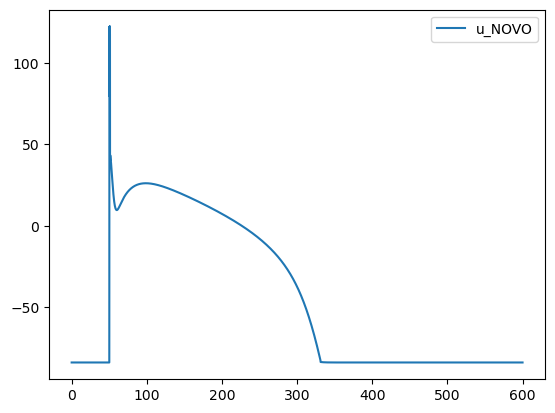

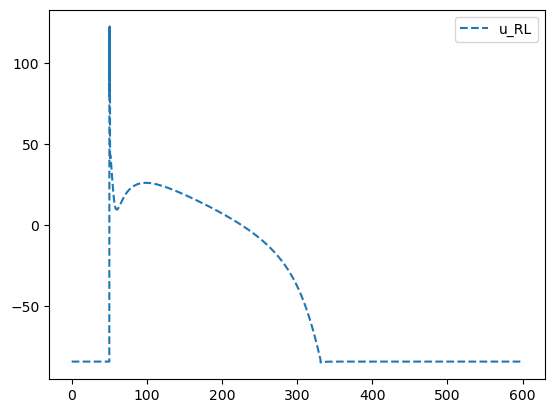

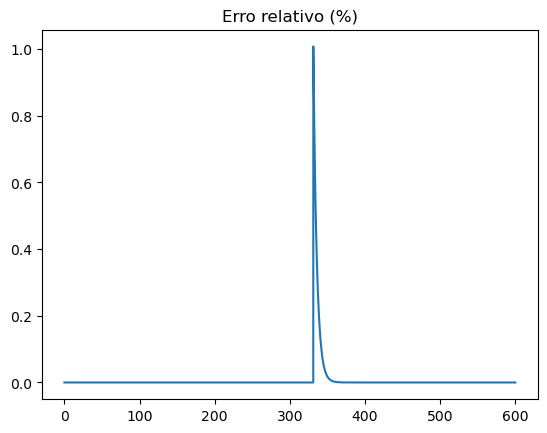

In [9]:
def I_stim(t):
    if ((50.0 < t < 51.0)):
        return 10.0
    else:
        return 0.0

# Configuracoes de tempo
dt = 0.1
t0 = 0
tf = 600
Num_pts_t = (int)((tf - t0) / dt) # Numero de pontos
t = np.linspace(0, tf, Num_pts_t+1) # Pontos no tempo

# Variables
u_rl = np.zeros((Num_pts_t+1))
v_rl = np.zeros((Num_pts_t+1))
w_rl = np.zeros((Num_pts_t+1))
s_rl = np.zeros((Num_pts_t+1))
u = np.zeros((Num_pts_t+1))
v = np.zeros((Num_pts_t+1))
w = np.zeros((Num_pts_t+1))
s = np.zeros((Num_pts_t+1))

# Initial conditions
for i in range(0, Num_pts_t+1):
  u_rl[i] = -84.0
  u[i] = -84.0
  w_rl[i] = 1.0
  s_rl[i] = 0.0

  u[i] = -84.0
  v[i] = 1.0
  w[i] = 1.0
  s[i] = 0.0

u_o =  -84.0
u_u = 135.406
theta_v = -58.29
theta_w =  -82.7145
theta_v_minus =-82.7145
theta_o = -83.4858
tau_v1_minus = 60.0
tau_v2_minus = 1150.0
tau_v_plus = 1.4506
tau_w1_minus = 60.0
tau_w2_minus = 15.0
k_w_minus = 0.7584597432905484
u_w_minus = -81.429
tau_w_plus = 200.0
tau_fi = 807.8939
tau_o1 = 400.0
tau_o2 = 6.0
tau_so1 = 30.0181
tau_so2 = 0.9957
k_so = 0.023337222870478413
u_so =  -28.294999999999995
tau_s1 = 2.7342
tau_s2 = 16.0
k_s = 0.02449708284714119
u_s = -6.1244099999999975
tau_si = 1.8875
tau_w_inf = 5.9990000000000006
w_inf_star = 0.94

erro_array = []

for i in range(Num_pts_t):
    # NOVO METODO - SOLUCAO ANALITICA DE U
    a = 0
    b = 0
    eq = ''
    if (H(u[i] - theta_v) == 1.0): # H_v = 1 -> solucao edo -u*c^2 - u*a - b
        a = (-v[i] / tau_fi) * (u_u + theta_v)
        b = (v[i] / tau_fi) * (u_u * theta_v)
        c = (v[i] / tau_fi)
        if (H(u[i] - theta_w) == 1.0): # H_w = 1
          b = b + (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
        else: # H_w = 0
          a = a + 1 / tau_o(u[i])
          b = b + (-u_o / tau_o(u[i]))
        if (4*b*c - a*a > 10**-1):
          u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt * 85.7 *np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt* 85.7
        else:
          u[i+1] = u[i] + dt* 85.7   * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    else: # H_v = 0
        if (H(u[i] - theta_w) == 1.0): # H_w = 1 -> solucao -b
          b = (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
          u[i+1] = u[i] - b*dt* 85.7  + I_stim(t[i])*dt* 85.7
        else: # H_w = 0 -> solucao -a*y - b
          a = 1 / tau_o(u[i])
          b = -u_o / tau_o(u[i])
          u[i+1] = (np.exp(-a*dt* 85.7) * ((b * (-np.exp(a*dt* 85.7))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt* 85.7

    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))

    u_rl[i + 1] = u_rl[i] + dt* 85.7   * (-(J_fi(u_rl[i], v[i]) + J_so(u_rl[i]) + J_si(u_rl[i], w[i], s[i])) + I_stim(t[i]))
    v_rl[i + 1] = v_rl[i] + dt * ((v_inf(u_rl[i]) - v_rl[i]) / tau_v(u_rl[i]))
    w_rl[i + 1] = w_rl[i] + dt * ((w_inf(u_rl[i]) - w_rl[i]) / tau_w(u_rl[i]))
    s_rl[i + 1] = s_rl[i] + dt * ((s_inf(u_rl[i]) - s_rl[i]) / tau_s(u_rl[i]))

    erro_array.append(abs(100*(u[i] - u_rl[i]) / u[i]))


plt.plot(t, u, label='u_NOVO')
plt.legend()
plt.show()

plt.plot(t, u_rl, '--',label='u_RL')
plt.legend()
plt.show()

plt.plot(t[:-1], erro_array)
plt.title('Erro relativo (%)')
plt.show()

## Normalizado

/tmp/ipykernel_17996/713148762.py:103: RuntimeWarning: invalid value encountered in scalar divide
  erro_array.append(abs(100*(u[i] - u_rl[i]) / u[i]))


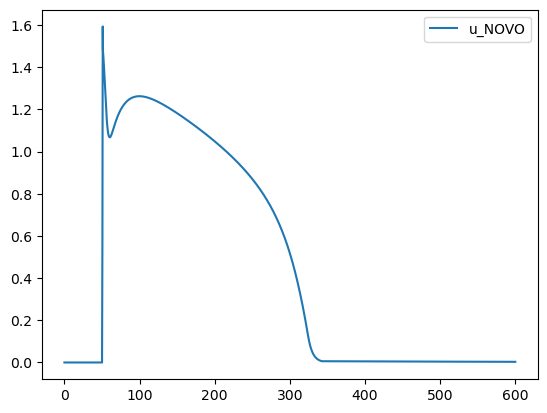

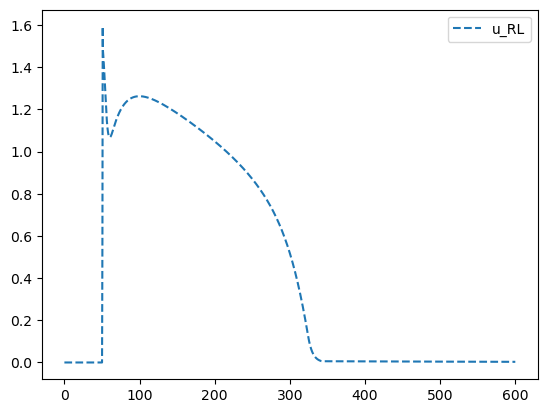

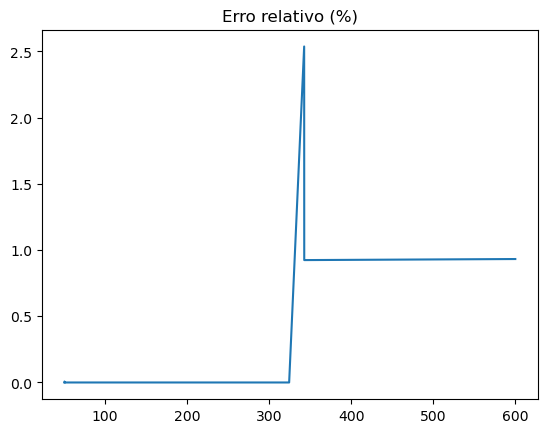

In [10]:
def I_stim(t):
    if ((50.0 < t < 51.0)):
        return 1.0
    else:
        return 0.0

# Configuracoes de tempo
dt = 0.1
t0 = 0
tf = 600
Num_pts_t = (int)((tf - t0) / dt) # Numero de pontos
t = np.linspace(0, tf, Num_pts_t+1) # Pontos no tempo

# Variables
u_rl = np.zeros((Num_pts_t+1))
v_rl = np.zeros((Num_pts_t+1))
w_rl = np.zeros((Num_pts_t+1))
s_rl = np.zeros((Num_pts_t+1))
u = np.zeros((Num_pts_t+1))
v = np.zeros((Num_pts_t+1))
w = np.zeros((Num_pts_t+1))
s = np.zeros((Num_pts_t+1))

# Initial conditions
for i in range(0, Num_pts_t+1):
  u_rl[i] = 0.0
  v_rl[i] = 1.0
  w_rl[i] = 1.0
  s_rl[i] = 0.0
  
  u[i] = 0.0
  v[i] = 1.0
  w[i] = 1.0
  s[i] = 0.0

u_o = 0.0
u_u = 1.55
theta_v = 0.3
theta_w = 0.13
theta_v_minus = 0.006
theta_o = 0.006
tau_v1_minus = 60.0
tau_v2_minus = 1150.0
tau_v_plus = 1.4506
tau_w1_minus = 60.0
tau_w2_minus = 15.0
k_w_minus = 65.0
u_w_minus = 0.03
tau_w_plus = 200.0
tau_fi = 0.11
tau_o1 = 400.0
tau_o2 = 6.0
tau_so1 = 30.0181
tau_so2 = 0.9957
k_so = 2.0458
u_so = 0.65
tau_s1 = 2.7342
tau_s2 = 16.0
k_s = 2.0994
u_s = 0.9087
tau_si = 1.8875
tau_w_inf = 0.07
w_inf_star = 0.94

erro_array = []

for i in range(Num_pts_t):
    # NOVO METODO - SOLUCAO ANALITICA DE U
    a = 0
    b = 0
    eq = ''
    if (H(u[i] - theta_v) == 1.0): # H_v = 1 -> solucao edo -u*c^2 - u*a - b
        a = (-v[i] / tau_fi) * (u_u + theta_v)
        b = (v[i] / tau_fi) * (u_u * theta_v)
        c = (v[i] / tau_fi)
        if (H(u[i] - theta_w) == 1.0): # H_w = 1
          b = b + (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
        else: # H_w = 0
          a = a + 1 / tau_o(u[i])
          b = b + (-u_o / tau_o(u[i]))
        if (4*b*c - a*a > 10**-1):
          u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt  *np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt
        else:
          u[i+1] = u[i] + dt   * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    else: # H_v = 0
        if (H(u[i] - theta_w) == 1.0): # H_w = 1 -> solucao -b
          b = (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
          u[i+1] = u[i] - b*dt  + I_stim(t[i])*dt
        else: # H_w = 0 -> solucao -a*y - b
          a = 1 / tau_o(u[i])
          b = -u_o / tau_o(u[i])
          u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt

    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))

    u_rl[i + 1] = u_rl[i] + dt   * (-(J_fi(u_rl[i], v[i]) + J_so(u_rl[i]) + J_si(u_rl[i], w[i], s[i])) + I_stim(t[i]))
    v_rl[i + 1] = v_rl[i] + dt * ((v_inf(u_rl[i]) - v_rl[i]) / tau_v(u_rl[i]))
    w_rl[i + 1] = w_rl[i] + dt * ((w_inf(u_rl[i]) - w_rl[i]) / tau_w(u_rl[i]))
    s_rl[i + 1] = s_rl[i] + dt * ((s_inf(u_rl[i]) - s_rl[i]) / tau_s(u_rl[i]))

    erro_array.append(abs(100*(u[i] - u_rl[i]) / u[i]))


plt.plot(t, u, label='u_NOVO')
plt.legend()
plt.show()

plt.plot(t, u_rl, '--',label='u_RL')
plt.legend()
plt.show()

plt.plot(t[:-1], erro_array)
plt.title('Erro relativo (%)')
plt.show()

## Debugando

/tmp/ipykernel_17996/1922589676.py:215: RuntimeWarning: invalid value encountered in scalar divide
  erro_array.append(abs(100*(u[i] - u_rl[i]) / u[i]))
/tmp/ipykernel_17996/1922589676.py:135: RuntimeWarning: invalid value encountered in sqrt
  termo_arctan = np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))
/tmp/ipykernel_17996/1922589676.py:136: RuntimeWarning: invalid value encountered in sqrt
  termo_tan = np.tan(((1/2)*dt* 85.7 *np.sqrt(4*b*c - a*a)) - termo_arctan)
/tmp/ipykernel_17996/1922589676.py:162: RuntimeWarning: invalid value encountered in sqrt
  u[i+1] = - np.sqrt(D / c) * (1 / np.tanh(np.sqrt(- c * D) * (dt - K))) - a /(2 * c)


Eq: u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt
t[543] = 54.300000000000004
u[543] = nan
u_rl[543] = nan
a[543] = 0.0
b[543] = 0.0
c[543] = 0.0
tan[543] = 0.0
arctan[543] = 0.0
raiz[543] = 0.0


Eq: u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt
t[544] = 54.400000000000006
u[544] = nan
u_rl[544] = nan
a[544] = 0.0
b[544] = 0.0
c[544] = 0.0
tan[544] = 0.0
arctan[544] = 0.0
raiz[544] = 0.0


Eq: u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt
t[545] = 54.5
u[545] = nan
u_rl[545] = nan
a[545] = 0.0
b[545] = 0.0
c[545] = 0.0
tan[545] = 0.0
arctan[545] = 0.0
raiz[545] = 0.0




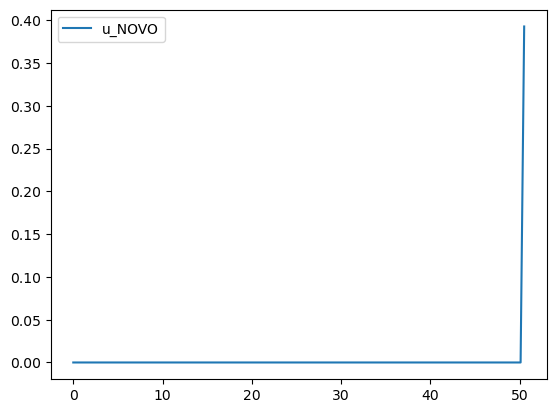

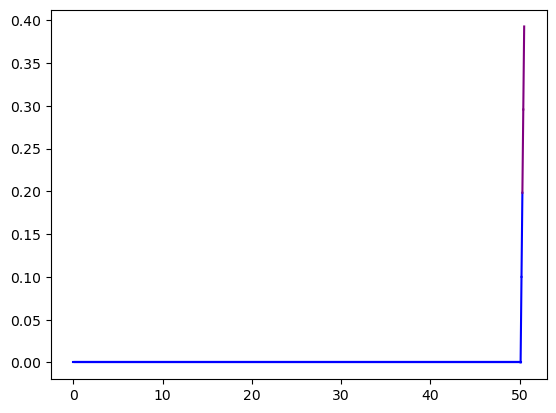

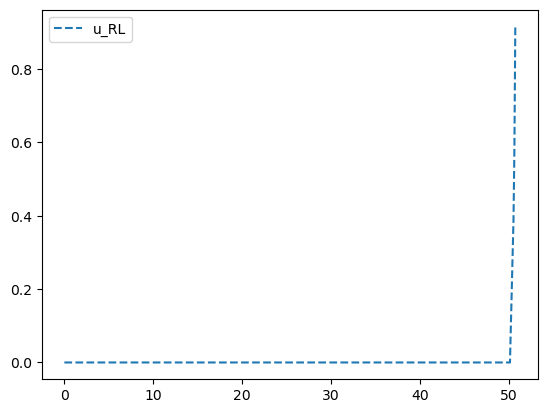

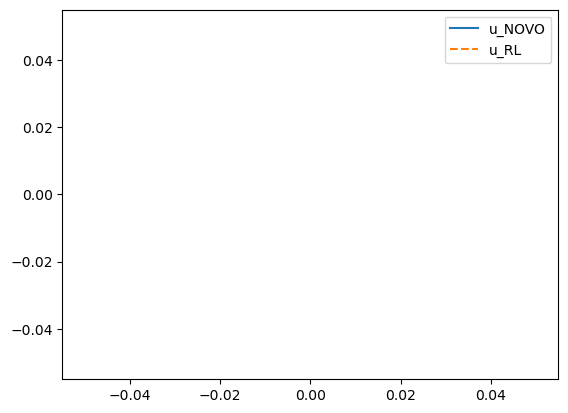

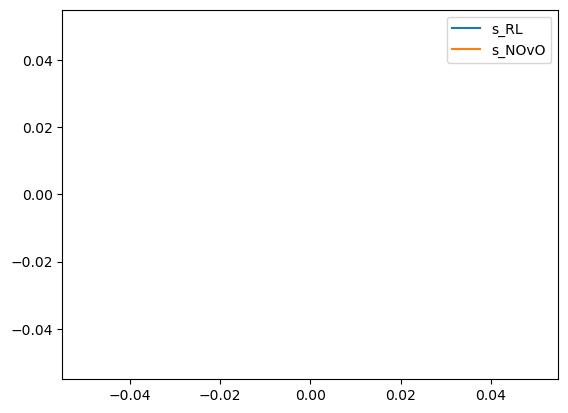

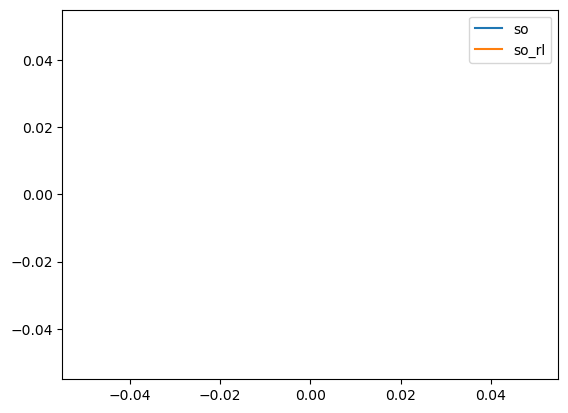

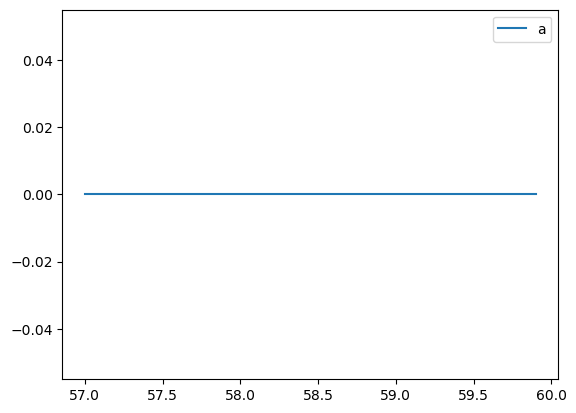

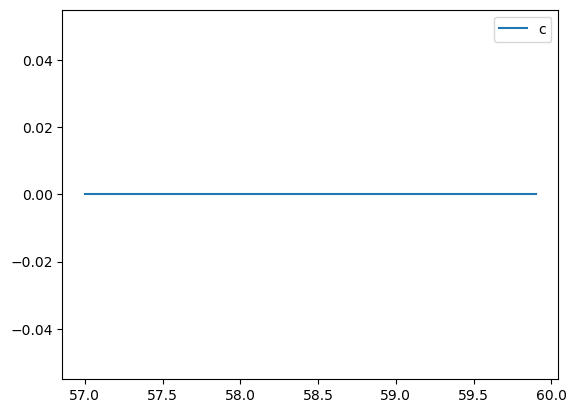

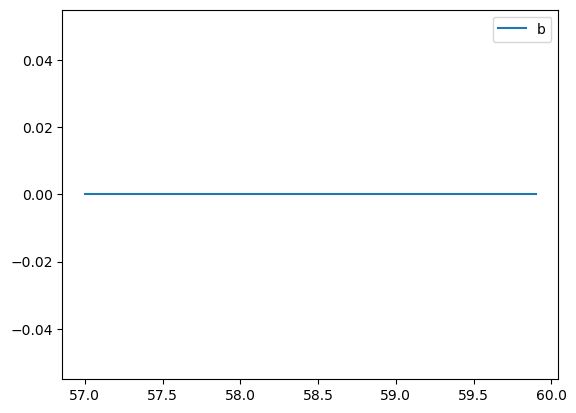

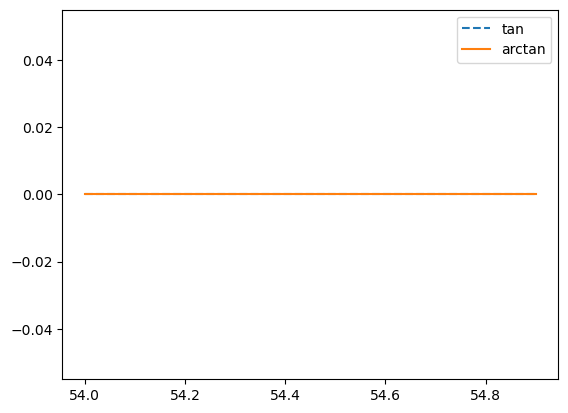

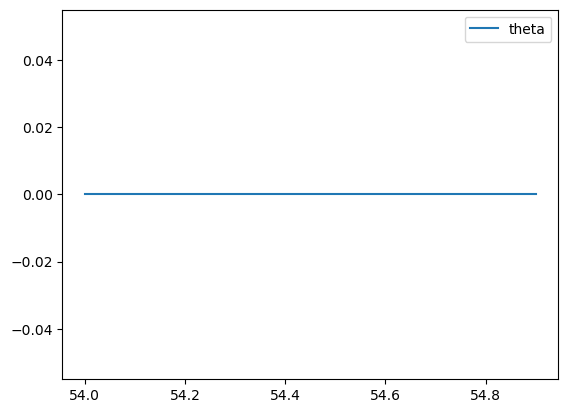

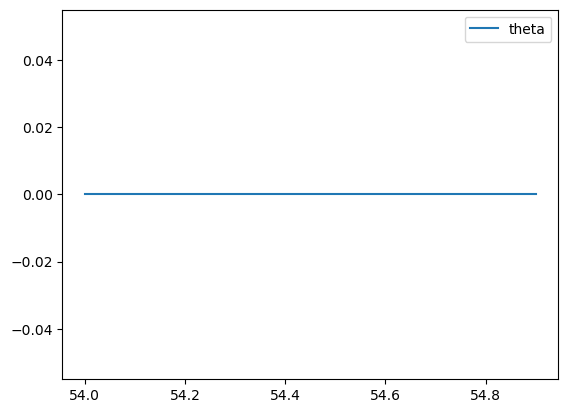

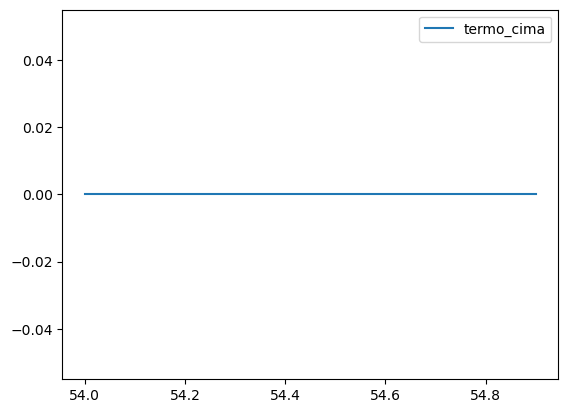

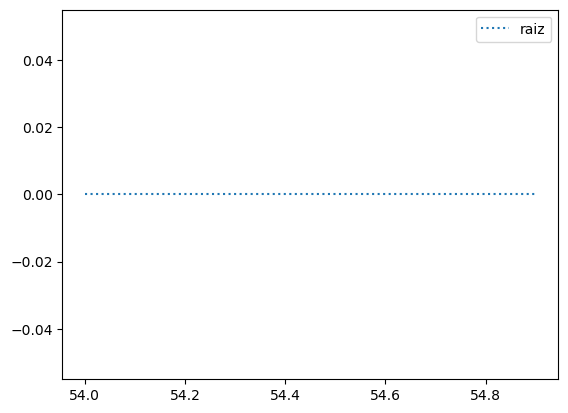

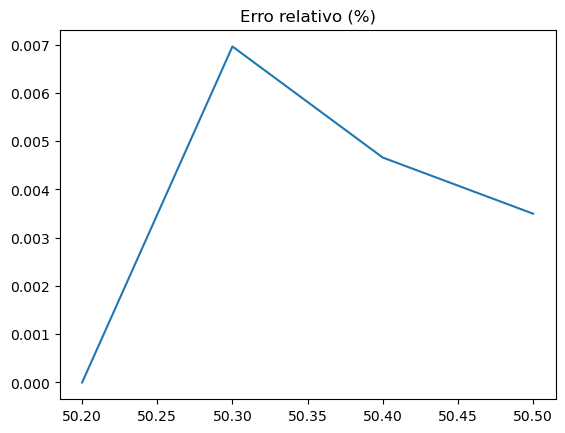

In [15]:
def I_stim(t):
    if ((50.0 < t < 51.0)):
        # return 10.0
        return 1.0
    else:
        return 0.0

# Configuracoes de tempo
dt = 0.1
t0 = 0
tf = 600
Num_pts_t = (int)((tf - t0) / dt) # Numero de pontos
t = np.linspace(0, tf, Num_pts_t+1) # Pontos no tempo

# Variables
u_rl = np.zeros((Num_pts_t+1))
v_rl = np.zeros((Num_pts_t+1))
w_rl = np.zeros((Num_pts_t+1))
s_rl = np.zeros((Num_pts_t+1))
u = np.zeros((Num_pts_t+1))
v = np.zeros((Num_pts_t+1))
w = np.zeros((Num_pts_t+1))
s = np.zeros((Num_pts_t+1))

# Initial conditions
for i in range(0, Num_pts_t+1):
  # u_rl[i] = -84.0
  # u[i] = -84.0
  u_rl[i] = 0.0
  v_rl[i] = 1.0
  w_rl[i] = 1.0
  s_rl[i] = 0.0
  v[i] = 1.0
  w[i] = 1.0
  s[i] = 0.0

erro_array = []

u_o = 0.0
u_u = 1.55
theta_v = 0.3
theta_w = 0.13
theta_v_minus = 0.006
theta_o = 0.006
tau_v1_minus = 60.0
tau_v2_minus = 1150.0
tau_v_plus = 1.4506
tau_w1_minus = 60.0
tau_w2_minus = 15.0
k_w_minus = 65.0
u_w_minus = 0.03
tau_w_plus = 200.0
tau_fi = 0.11
tau_o1 = 400.0
tau_o2 = 6.0
tau_so1 = 30.0181
tau_so2 = 0.9957
k_so = 2.0458
u_so = 0.65
tau_s1 = 2.7342
tau_s2 = 16.0
k_s = 2.0994
u_s = 0.9087
tau_si = 1.8875
tau_w_inf = 0.07
w_inf_star = 0.94

# u_o =  -84.0
# u_u = 135.406
# theta_v = -58.29
# theta_w =  -82.7145
# theta_v_minus =-82.7145
# theta_o = -83.4858
# tau_v1_minus = 60.0
# tau_v2_minus = 1150.0
# tau_v_plus = 1.4506
# tau_w1_minus = 60.0
# tau_w2_minus = 15.0
# k_w_minus = 0.7584597432905484
# u_w_minus = -81.429
# tau_w_plus = 200.0
# tau_fi = 807.8939
# tau_o1 = 400.0
# tau_o2 = 6.0
# tau_so1 = 30.0181
# tau_so2 = 0.9957
# k_so = 0.023337222870478413
# u_so =  -28.294999999999995
# tau_s1 = 2.7342
# tau_s2 = 16.0
# k_s = 0.02449708284714119
# u_s = -6.1244099999999975
# tau_si = 1.8875
# tau_w_inf = 5.9990000000000006
# w_inf_star = 0.94

raiz_array = np.zeros((Num_pts_t+1))
tan_array = np.zeros((Num_pts_t+1))
arctan_array = np.zeros((Num_pts_t+1))
tau_o_array = np.zeros((Num_pts_t+1))
tau_so_array = np.zeros((Num_pts_t+1))
tau_so_array_rl = np.zeros((Num_pts_t+1))
a_array = np.zeros((Num_pts_t+1))
b_array = np.zeros((Num_pts_t+1))
c_array = np.zeros((Num_pts_t+1))
H_w_array = np.zeros((Num_pts_t+1))
H_v_array = np.zeros((Num_pts_t+1))
theta_array = np.zeros((Num_pts_t+1))
termocima_array = np.zeros((Num_pts_t+1))
colors = []

for i in range(Num_pts_t):
    H_w_array[i] = H(u[i] - theta_w)
    H_v_array[i] = H(u[i] - theta_v)
    tau_so_array[i] = tau_so(u[i])
    tau_so_array_rl[i] = tau_so(u_rl[i])
    tau_o_array[i] = tau_o(u[i])
    # NOVO METODO - SOLUCAO ANALITICA DE U
    a = 0
    b = 0
    eq = ''
    # colors.append('lightgray')
    if (H(u[i] - theta_v) == 1.0): # H_v = 1 -> solucao edo -u*c^2 - u*a - b
        a = (-v[i] / tau_fi) * (u_u + theta_v)
        b = (v[i] / tau_fi) * (u_u * theta_v)
        c = (v[i] / tau_fi)
        if (H(u[i] - theta_w) == 1.0): # H_w = 1
          colors.append('red')
          b = b + (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
        else: # H_w = 0
          colors.append('green')
          a = a + 1 / tau_o(u[i])
          b = b + (-u_o / tau_o(u[i]))
        # termo_tan = ((4*b*c - a*a))
        termo_arctan = np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))
        termo_tan = np.tan(((1/2)*dt* 85.7 *np.sqrt(4*b*c - a*a)) - termo_arctan)
        # if (4*b*c - a*a > 10**-10 and np.abs(termo_tan % (np.pi/2)) > 10**-10):
        a_array[i] = a
        b_array[i] = b
        c_array[i] = c
        termocima_array[i] = a + 2*u[i]*c
        raiz_array[i] = ((4*b*c - a*a))
        D = b - a*a / (4*c)
        if (D > 10**-10):
          tan_array[i] = (termo_tan)
          arctan_array[i] = (termo_arctan)
          theta = (1/2)*dt * np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c) / np.sqrt(4*b*c - a*a))
          theta_array[i] = theta
          # essa parte é responsavel pelo erro na despolarizacao (nao tem a ver com divisao por 0) -> erro aumenta nessa parte conforme aumenta dt
          eq = 'u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt *np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt'
          # u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt  *np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt

          K = (1 / np.sqrt(c * D)) * (np.arctan((np.sqrt(c*D)) * (u[i] + (a / 2*c))))
          u[i+1] = - (1 / np.sqrt(c * D)) * np.tan(np.sqrt(c * D) * (dt - K)) - a/(2 * c)
          
          # u[i+1] = - (np.sqrt(4*b*c - a*a) * ((1/2)*dt *np.sqrt(4*b*c - a*a) - ((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt
          # u[i+1] = u[i] + dt * (-(a * u[i] + b)) + I_stim(t[i])*dt
          # u[i+1] = -(a/2*c) - ((np.sqrt(-a*a+4*b*c) * np.sin((1/2 * np.sqrt(-a*a+4*b*c) * dt * np.arctan((a+2*c*u[i])/(-a*a+4*b*c))))) / (np.cos( (1/2) * np.sqrt(-a*a+4*b*c) * dt * np.arctan((a+2*c*u[i])/(-a*a+4*b*c)) )) ) / 2*c + I_stim(t[i])*dt
          # u[i+1] = u[i] + dt   * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
        elif (D < 10**-10):
           K = (1 / np.sqrt(-c * D)) * (np.arctanh((- (u[i] + a / (2*c))) / (np.sqrt(-D/c)) ))
           u[i+1] = - np.sqrt(D / c) * (1 / np.tanh(np.sqrt(- c * D) * (dt - K))) - a /(2 * c)
        else:
          eq = 'padrao'
          colors.append('lightgray')
          u[i+1] = u[i] + dt   * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))
    else: # H_v = 0
        if (H(u[i] - theta_w) == 1.0): # H_w = 1 -> solucao -b
          colors.append('purple')
          b = (1 / tau_so(u[i]) -w[i]*s[i] / tau_si)
          u[i+1] = u[i] - b*dt  + I_stim(t[i])*dt
          eq = 'u[i+1] = -b*dt'
        else: # H_w = 0 -> solucao -a*y - b
          colors.append('blue')
          a = 1 / tau_o(u[i])
          b = -u_o / tau_o(u[i])
          u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt
          eq = 'u[i+1] = (np.exp(-a*dt) * ((b * (-np.exp(a*dt))) + a*u[i] + b)) / (a) + I_stim(t[i])*dt'
          # u[i+1] = u[i] + dt   * (-(J_fi(u[i], v[i]) + J_so(u[i]) + J_si(u[i], w[i], s[i])) + I_stim(t[i]))

    if i == 54.3*10 or i == 54.4*10 or i == 54.5*10:
        # if i == 54.3*10:
            # print('Eq: u[i+1] = - (np.sqrt(4*b*c - a*a) * np.tan((1/2)*dt *np.sqrt(4*b*c - a*a) - np.arctan((a + 2*u[i]*c)/(np.sqrt(4*b*c - a*a)))) + a) / 2*c + I_stim(t[i])*dt')
        print(f'Eq: {eq}')
        print(f't[{i}] = {t[i]}')
        print(f'u[{i}] = {u[i]}')
        print(f'u_rl[{i}] = {u_rl[i]}')
        # print(f's[{i}] = {s[i]}')
        # print(f's_rl[{i}] = {s_rl[i]}')
        # print(f'w[{i}] = {w[i]}')
        # print(f'w_rl[{i}] = {w_rl[i]}')
        # print(f'v[{i}] = {v[i]}')
        # print(f'v_rl[{i}] = {v_rl[i]}')
        # print(f'tau_so[{i}] = {tau_so_array[i]}')
        # print(f'tau_so_rl[{i}] = {tau_so_array_rl[i]}')
        # print(f'tau_o[{i}] = {tau_o_array[i]}')
        print(f'a[{i}] = {a_array[i]}')
        print(f'b[{i}] = {b_array[i]}')
        print(f'c[{i}] = {c_array[i]}')
        print(f'tan[{i}] = {tan_array[i]}')
        print(f'arctan[{i}] = {arctan_array[i]}')
        print(f'raiz[{i}] = {raiz_array[i]}')
        print('\n')

    v[i + 1] = v[i] + dt * ((v_inf(u[i]) - v[i]) / tau_v(u[i]))
    w[i + 1] = w[i] + dt * ((w_inf(u[i]) - w[i]) / tau_w(u[i]))
    s[i + 1] = s[i] + dt * ((s_inf(u[i]) - s[i]) / tau_s(u[i]))

    u_rl[i + 1] = u_rl[i] + dt   * (-(J_fi(u_rl[i], v[i]) + J_so(u_rl[i]) + J_si(u_rl[i], w[i], s[i])) + I_stim(t[i]))
    v_rl[i + 1] = v_rl[i] + dt * ((v_inf(u_rl[i]) - v_rl[i]) / tau_v(u_rl[i]))
    w_rl[i + 1] = w_rl[i] + dt * ((w_inf(u_rl[i]) - w_rl[i]) / tau_w(u_rl[i]))
    s_rl[i + 1] = s_rl[i] + dt * ((s_inf(u_rl[i]) - s_rl[i]) / tau_s(u_rl[i]))

    # colors[i] = color
    erro_array.append(abs(100*(u[i] - u_rl[i]) / u[i]))


plt.plot(t, u, label='u_NOVO')
plt.legend()
plt.show()

for i in range(len(t)-1):
    plt.plot(t[i:i+2], u[i:i+2], color=colors[i])
plt.show()

########################
# for i in range(Num_pts_t):
#     u_rl[i + 1] = u_rl[i] + dt * 85.7  * (-(J_fi(u_rl[i], v[i]) + J_so(u_rl[i]) + J_si(u_rl[i], w[i], s[i])) + I_stim(t[i]))
#     v[i + 1] = v[i] + dt * ((v_inf(u_rl[i]) - v[i]) / tau_v(u_rl[i]))
#     w[i + 1] = w[i] + dt * ((w_inf(u_rl[i]) - w[i]) / tau_w(u_rl[i]))
#     s[i + 1] = s[i] + dt * ((s_inf(u_rl[i]) - s[i]) / tau_s(u_rl[i]))
plt.plot(t, u_rl, '--',label='u_RL')
plt.legend()
plt.show()

# plt.plot(t, u, label='u_NOVO')
# plt.plot(t, u_rl, '--',label='u_RL')
# plt.legend()
# plt.show()

# Procurando em qual t os valores exatamente divergem -> 54.5
# plt.plot(t[10*50:10*55], u[10*50:10*55], label='u_NOVO')
# plt.plot(t[10*50:10*55], u_rl[10*50:10*55], '--', label='u_RL')

# Verificando se o problema esta nas outras variaveis de estado do problema
# plt.plot(t, v, label='v_NOVO')
# plt.plot(t, v_rl, label='v_RL')
# plt.legend()
# plt.show()
# plt.plot(t, w, label='w_NOvO')
# plt.plot(t, w_rl, label='w_RL')
# plt.legend()
# plt.show()

plt.plot(t[543:548], u[543:548], label='u_NOVO')
plt.plot(t[543:548], u_rl[543:548], '--',label='u_RL')
plt.legend()
plt.show()

# Esta em s:
plt.plot(t[10*54:10*55], s_rl[10*54:10*55], label='s_RL')
plt.plot(t[10*54:10*55], s[10*54:10*55], label='s_NOvO')
plt.legend()
plt.show()

# tau_so responsavel pelo problema
# plt.plot(t[10*54:10*55], tau_o_array[10*54:10*55], label='o')
plt.plot(t[10*54:10*55], tau_so_array[10*54:10*55], label='so')
plt.plot(t[10*54:10*55], tau_so_array_rl[10*54:10*55], label='so_rl')
plt.legend()
plt.show()

plt.plot(t[10*57:10*60], a_array[10*57:10*60], label='a')
# problema está no b (depende de tau_so)
plt.legend()
plt.show()
plt.plot(t[10*57:10*60], c_array[10*57:10*60], label='c')
plt.legend()
plt.show()
plt.plot(t[10*57:10*60], b_array[10*57:10*60], label='b')
plt.legend()
plt.show()

plt.plot(t[10*54:10*55], tan_array[10*54:10*55], '--', label='tan')
plt.plot(t[10*54:10*55], arctan_array[10*54:10*55], label='arctan')
plt.legend()
plt.show()

plt.plot(t[10*54:10*55], theta_array[10*54:10*55], label='theta')
plt.legend()
plt.show()

plt.plot(t[10*54:10*55], theta_array[10*54:10*55], label='theta')
plt.legend()
plt.show()

plt.plot(t[10*54:10*55], termocima_array[10*54:10*55], label='termo_cima')
plt.legend()
plt.show()

# plt.plot(t[10*54:10*55], H_v_array[10*54:10*55], label='h_v')
# plt.legend()
# plt.show()

# plt.plot(t[10*54:10*55], H_w_array[10*54:10*55], label='h_w')
# plt.legend()
# plt.show()

for i in range(u.size):
    # print(np.abs(u[i] - u_rl[i]))
    # if (np.abs(u[i] - u_rl[i]) > 10**-2):
   if t[i] > 54.0 and t[i] < 56.0:
    if (np.abs(tau_so_array[i]) > 5):
        print(t[i])
        break

plt.plot(t[10*54:10*55], raiz_array[10*54:10*55], ':', label='raiz')
# plt.plot(tan_array , label='tan')
# plt.plot(arctan_array, '--',label='arctan')
plt.legend()
plt.show()

plt.plot(t[:-1], erro_array)
plt.title('Erro relativo (%)')
plt.show()